[0, 0, 0]
[255, 255, 255]


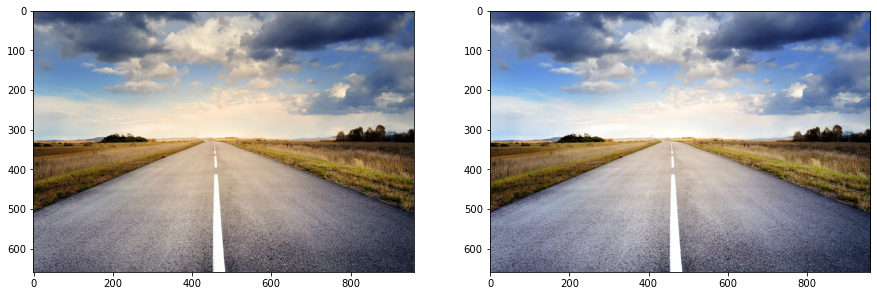

In [9]:
from skimage.io import imread,imshow,imsave
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# 自动色阶亮度
def AutoBrightness(raw_img):
    rgb_min_output = 0
    rgb_max_output = 255
    channel_list = []

    # 计算各通道的直方图，确定输入的最大/小值
    channel_min_input = [np.min(raw_img[:,:,c]) for c in range(3)]
    channel_max_input = [np.max(raw_img[:,:,c]) for c in range(3)]   
    print(channel_min_input)
    print(channel_max_input)
    hist_list = []
    for i in range(3):
        hist_c, bin_edges = np.histogram(raw_img[:, :, i], bins=256, range=(0, 256), density=True)
        hist_list.append(hist_c)

    hist_array = np.array(hist_list)
    for c in range(3):
        sum = 0
        for index, element in enumerate(hist_array[c]):
            sum += element
            if sum > 0.99:
                channel_max_input[c] = index
                break

    # 计算各值的输出值
    for i in range(3):
        channel = [0] * (channel_max_input[i] + 1)        
        for x in range(channel_min_input[i], channel_max_input[i] + 1):
            output = rgb_min_output + \
                     (x - channel_min_input[i]) / \
                     (channel_max_input[i] - channel_min_input[i]) * \
                     (rgb_max_output - rgb_min_output) + 0.5
            channel[x] = output
        channel_list.append(channel)

    # 图像色阶调整
    dst = raw_img.copy()
    for w in range(raw_img.shape[0]):
        for h in range(raw_img.shape[1]):
            for c in range(3):
                try:
                    dst[w, h, c] = channel_list[c][raw_img[w, h, c]]
                except Exception as ex:
                    if raw_img[w, h, c] > channel_max_input[c]:
                        dst[w, h, c] = 255    
    return dst


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(AutoBrightness(im))